In [9]:
import pandas as pd # serve para manipular dataframe em python
import numpy as np # serve para manipular vetores em python (mais econômica computacionalmente que o pandas)

# Usado para visualização dos dados
import seaborn as sns
from matplotlib import pyplot as plt


# Importando o algortimo de árvore de classificação
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Pré-processamento de dados
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# Usada para dividir os dados em treino e teste
from sklearn.model_selection import train_test_split

# Importando métricas
from sklearn import metrics


In [10]:
# Vamos aplicar árvore de decisão para tentar prever os passageiros que podem sobreviver no desastre do titanic

Acredito que todo mundo conhece a história do navio Titanic e do seu naufrágio. 

Apesar do Titanic ser o navio mais moderno da época, após colidir com um iceberg em 15 de abril de 1912, seu naufrágio matou 1502 pessoas de um total de 2224 passageiros.

- Vamos construir um modelo que dê a previsão de sobrevivência para um passageiro qualquer que seja fornecido como entrada.
- Para isso, vamos seguir a ordem das questões práticas para chegar em um modelo resposta!
Dados:
- Dados de treino: dentro da pasta possuímos o arquivo train.csv;
Devemos construir o modelo nesse conjunto de dados;
- Dados de teste: dentro da pasta possuímos o arquivo test.csv;
Devemos fazer a predição do nosso modelo nesse conjunto de dados;
Repare que nesse conjunto de dados não temos a coluna que será predita;
Metadados:
- Variável resposta:
Survived: Informa se o passageiro sobreviveu ao desastre
- 0 = Não
- 1 = Sim
- Variáveis preditoras:
- PassengerId: Número de identificação do passageiro
Pclass: Classe do bilhete
- 1 = 1ª Classe
- 2 = 2ª Classe
- 3 = 3ª Classe
- Name: Nome do passageiro
- Sex: Sexo do passageiro
- Age: Idade do passageiro
- SibSp: Quantidade de cônjuges e irmãos a bordo
- Parch: Quantidade de pais e filhos a bordo
- Ticket: Número da passagem
- Fare: Preço da Passagem
- Cabin: Número da cabine do passageiro
- Embarked: Porto no qual o passageiro embarcou
- C = Cherbourg
- Q = Queenstown
- S = Southampton


#### Link com a imagem explicando o funcionamento da Árvore de Decisão pra Classificação

- https://github.com/brstpam/IA/blob/main/imagem%20trabalho%20nava.png

In [11]:
# Existe a possibilidade de importar as bases da máquina pessoal

# from google.colab import files
# uploaded = files.upload()

In [12]:
train = pd.read_csv('https://raw.githubusercontent.com/brstpam/IA/main/train.csv')

In [13]:
test = pd.read_csv('https://raw.githubusercontent.com/brstpam/IA/main/test.csv')

In [14]:
# Verificando o tamanho do dataset de treino - 68,07% para o conjunto de treino - base total (1309 linhas no total)

train.shape

(891, 12)

In [15]:
# Verificando o tamanho do datasetd e teste - 31,93% para o conjunto de teste

test.shape 

(418, 11)

In [16]:
# Verificando o cabeçalho de cada dataset

train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
# A nossa variavel de interesse está na coluna "Survived", por isso que não temos ela na nossa base de teste

In [19]:
# Em um problema de machine leanring nós dividimos o conjunto de dados em treino e teste

# Nesse, em particular, já está dividido

In [20]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [22]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [23]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [24]:
# base de comparacao para verificar metricas

gender = pd.read_csv('https://raw.githubusercontent.com/brstpam/IA/main/gender_submission.csv')

In [25]:
# Para verificar os dados estatisticos (média, desvio padrão, quartis, mínimo e máximo)

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [27]:
gender.columns # Não é necessário eliminar nenhuma coluna

Index(['PassengerId', 'Survived'], dtype='object')

In [28]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

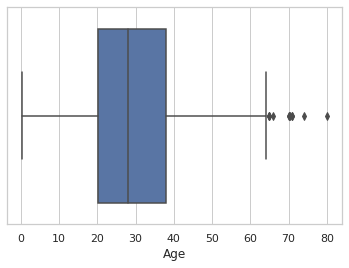

In [29]:
# Vamos verificar a presença de outliers e decidir se vamos eliminar, substituir pela média da idade ou substituir pela mediana

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=train['Age'])

In [30]:
round(train.Age.mean(),4)

29.6991

In [31]:
round(train.Age.median(),4)

28.0

In [32]:
round(train[train['Sex'] == 'male']['Age'].mean(),4)

30.7266

In [33]:
round(train[train['Sex'] == 'female']['Age'].mean(),4)

27.9157

In [34]:
# Vamos substituir a idade faltante dos homens por 31 e a idade faltante das mulheres por 28

train.loc[(train['Age'].isnull() & (train.Sex == 'female')),'Age'] = 28

train.loc[(train['Age'].isnull() & (train.Sex == 'male')),'Age'] = 31

In [35]:
# conseguimos retirar as idades faltantes

train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
# ainda temos dois valores nulos na coluna Embarked

# vamos precisar tratar esses valores tbm 

In [37]:
train['Embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [38]:
train.loc[train['Embarked'].isnull(),'Embarked'] = 'S'

In [39]:
# Base de treino está tratada, pois eliminamos os valores nulos

train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [40]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [41]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


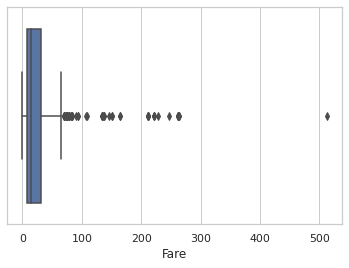

In [42]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=test['Fare'])

- Analisando as características (média e mediana) da coluna 'Fare' para decidir se vamos substituir o valor nulo ou eliminá-lo

In [43]:
train['Fare'].median()

14.4542

In [44]:
test['Fare'].median()

14.4542

In [45]:
train['Fare'].mean()

32.2042079685746

In [46]:
test['Fare'].mean()

35.6271884892086

In [47]:
test['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [48]:
# Eliminando a linha com Fare nulo

# test.dropna(subset=['Fare'],inplace=True)

test.loc[test['Fare'].isnull()] = train.Fare.mean()

In [49]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          326
Embarked         0
dtype: int64

In [50]:
# Substituindo idades nulas no dataset de teste

test.loc[(test['Age'].isnull() & (test.Sex == 'female')),'Age'] = 28

test.loc[(test['Age'].isnull() & (test.Sex == 'male')),'Age'] = 31

In [51]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          326
Embarked         0
dtype: int64

In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
# Vamos eliminar colunas que não vamos utilizar no nosso modelo

train.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [54]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892.0,3.0,"Kelly, Mr. James",male,34.5,0.0,0.0,330911,7.8292,NaN,Q
1,893.0,3.0,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0.0,363272,7.0000,NaN,S
2,894.0,2.0,"Myles, Mr. Thomas Francis",male,62.0,0.0,0.0,240276,9.6875,NaN,Q
3,895.0,3.0,"Wirz, Mr. Albert",male,27.0,0.0,0.0,315154,8.6625,NaN,S
4,896.0,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1.0,1.0,3101298,12.2875,NaN,S


In [55]:
test.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [56]:
# Criando uma instância para a Árvore de Decisão

# Profundidade maxima igual a 5 e random_state igual a 42

DT = DecisionTreeClassifier(max_depth=5, random_state = 42)

# Dividindo em conjunto de treino e teste

X_train = train.drop(columns=['Survived'])

y_train = train['Survived']

X_test = test

y_test = gender['Survived']

In [57]:
X_train.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

- Substituindo os valores 'male' e 'female' por 0 e 1 respectivamente. A função apply é mais performática, pois roda com linguagem C por baixo.



In [58]:
X_train = X_train.apply(lambda x:x.replace('male','0').replace('female','1'))

X_test = X_test.apply(lambda x: x.replace('male','0').replace('female','1'))

In [59]:
X_train = X_train.apply(lambda x:x.replace('S','0').replace('C','1').replace('Q','1'))

X_test = X_test.apply(lambda x:x.replace('S','0').replace('C','1').replace('Q','1'))

In [60]:
X_train.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [61]:
y_train.dtypes

dtype('int64')

In [62]:
DT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [63]:
# Acurácia do conjunto de treino

from sklearn import metrics

pred_train = DT.predict(X_train)

round(metrics.accuracy_score(y_train,pred_train),4)

0.8418

In [64]:
# Acurácia no conjunto de teste

pred_test = DT.predict(X_test)

round(metrics.accuracy_score(y_test,pred_test),4)

0.9545

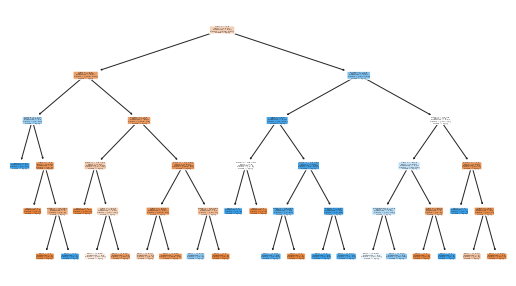

In [65]:
plt.figure(figsize=(9,5))
plot_tree(DT,feature_names = X_train.columns,filled = True, rounded = True,class_names = True)
plt.show()

In [66]:
AD = DecisionTreeClassifier(max_depth=2, random_state = 42)

In [67]:
AD.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

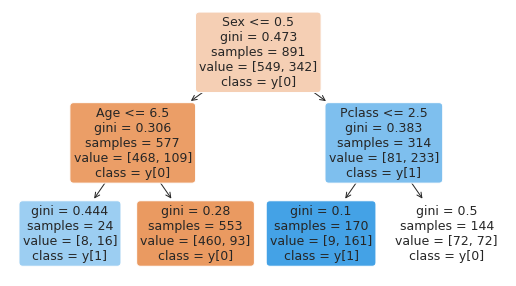

In [68]:
plt.figure(figsize=(9,5))
plot_tree(AD,feature_names = X_train.columns,filled = True, rounded = True,class_names = True);

In [69]:
# Verificando a acurácia de AD para o treino

pred_train = AD.predict(X_train)

round(metrics.accuracy_score(y_train,pred_train),4)

0.7957

In [70]:
# Verificando a acurácia de AD para o teste

pred_test = AD.predict(X_test)

round(metrics.accuracy_score(y_test,pred_test),4)

0.8086

In [71]:
# Verificando a precision de AD para o treino

round(metrics.precision_score(y_train,pred_train),4)

0.9124

In [72]:
# Verificando a precision de AD para o treino

round(metrics.precision_score(y_test,pred_test),4)

0.9091

In [73]:
# Verificando o recall para o conjunto de treino

round(metrics.recall_score(y_train,pred_train),4)

0.5175

In [74]:
# Verificando o recall para o conjunto de teste

round(metrics.recall_score(y_test,pred_test),4)

0.5263

In [75]:
# Verificando o f1_score de AD para o treino

round(metrics.f1_score(y_train,pred_train),4)

0.6604

In [76]:
# Verificando o f1_score de AD para o teste

round(metrics.f1_score(y_test,pred_test),4)

0.6667

In [77]:
#from google.colab import auth
#auth.authenticate_user()

#from googleapiclient.discovery import build
#drive_service = build('drive', 'v3')
